In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Project/Section6/PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


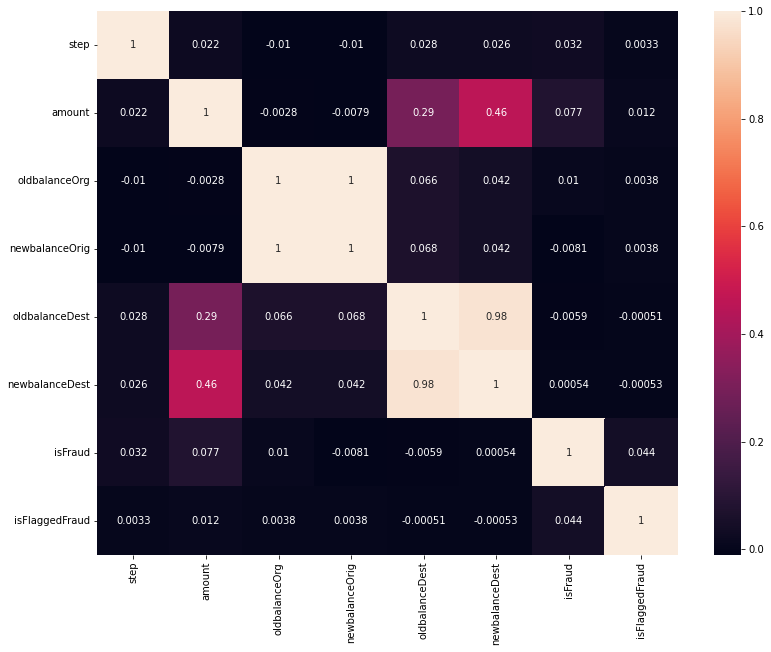

In [8]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot=True);

In [9]:
pd.crosstab(df['type'], df['isFraud'])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


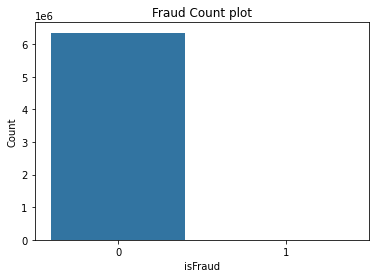


0    6354407
1       8213
Name: isFraud, dtype: int64


In [10]:
sns.countplot(data=df, x='isFraud')
plt.ylabel('Count')
plt.title('Fraud Count plot')
plt.show()

print()
print(df['isFraud'].value_counts())

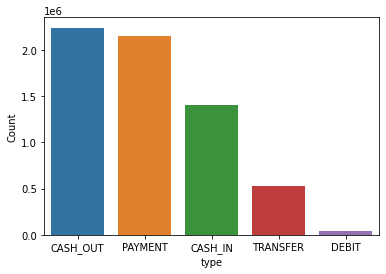


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [11]:
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.ylabel('Count')
plt.show()

print()
print(df['type'].value_counts())

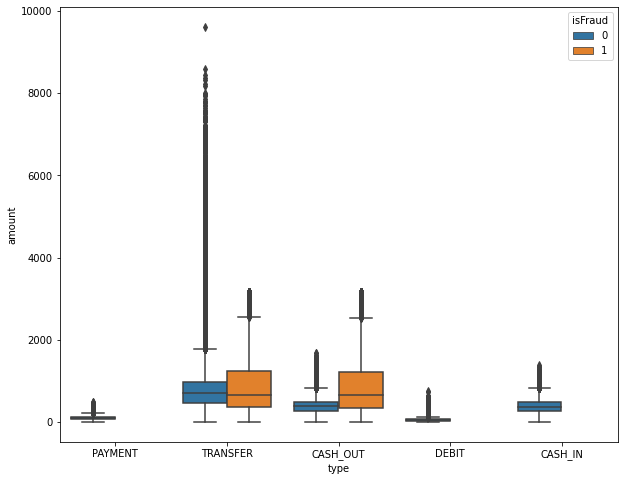

In [12]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='type', y=np.sqrt(df['amount']), hue='isFraud')

In [13]:
df.groupby('type')['isFraud','isFlaggedFraud'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,isFraud,isFlaggedFraud
type,,
CASH_IN,0,0
CASH_OUT,4116,0
DEBIT,0,0
PAYMENT,0,0
TRANSFER,4097,16


* 

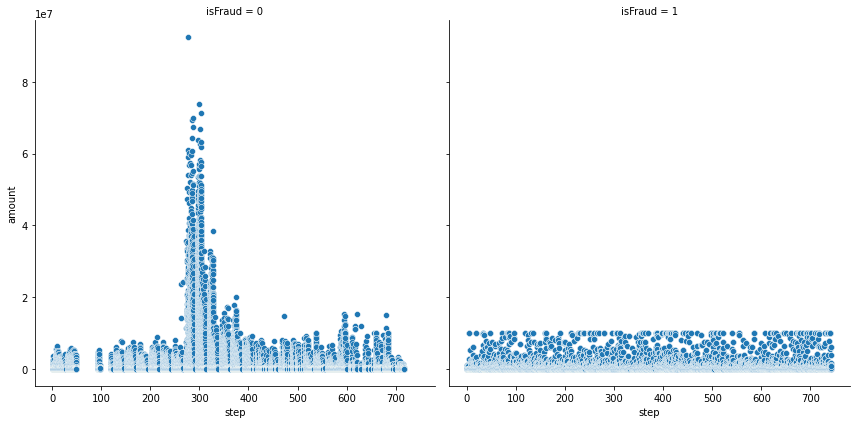

In [14]:
grid = sns.FacetGrid(data=df, col='isFraud')
grid.fig.set_size_inches(12, 6)
grid.map(sns.scatterplot, 'step', 'amount')

In [15]:
pd.options.display.float_format = '{:.2f}'.format
df[df['isFraud'] == 1].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,8213.00,8213.00,8213.00,8213.00,8213.00,8213.00,8213.00,8213.00
mean,368.41,1467967.30,1649667.61,192392.63,544249.62,1279707.62,1.00,0.00
std,216.39,2404252.95,3547719.44,1965666.46,3336420.95,3908816.53,0.00,0.04
min,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,181.00,127091.33,125822.44,0.00,0.00,0.00,1.00,0.00
50%,367.00,441423.44,438983.45,0.00,0.00,4676.42,1.00,0.00
75%,558.00,1517771.48,1517771.48,0.00,147828.66,1058725.22,1.00,0.00
max,743.00,10000000.00,59585040.37,49585040.37,236230516.82,236726494.66,1.00,1.00


In [16]:
df[(df['isFraud'] == 1) & (df['amount'] == 10000000)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4440,4,TRANSFER,10000000.00,C7162498,12930418.44,2930418.44,C945327594,0.00,0.00,1,0
4441,4,CASH_OUT,10000000.00,C351297720,10000000.00,0.00,C766681183,0.00,9941904.21,1,0
481250,19,TRANSFER,10000000.00,C416779475,11861008.32,1861008.32,C380259496,0.00,0.00,1,0
481251,19,CASH_OUT,10000000.00,C2050703310,10000000.00,0.00,C1622860679,504326.62,10342417.90,1,0
586311,33,TRANSFER,10000000.00,C1439740840,19887819.06,9887819.06,C875288652,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362579,741,CASH_OUT,10000000.00,C1647199421,10000000.00,0.00,C2077145577,35922.97,10035922.97,1,0
6362580,741,TRANSFER,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.00,0.00,1,0
6362581,741,CASH_OUT,10000000.00,C677394894,10000000.00,0.00,C1866259073,0.00,10000000.00,1,0
6362582,741,TRANSFER,10000000.00,C1945606464,15674547.89,5674547.89,C625944676,0.00,0.00,1,0


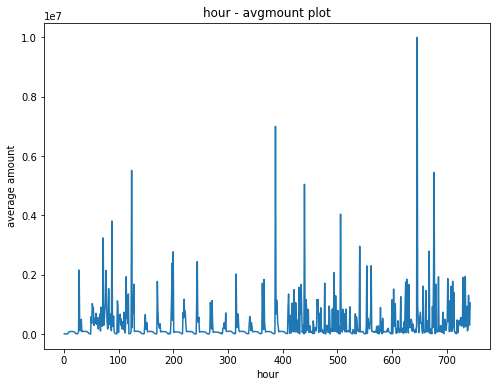

In [17]:
hour = df.step.unique()
median = [np.median(df[df.step == i].amount) for i in hour]
plt.figure(figsize=(8, 6))
plt.plot(hour, median)
plt.xlabel('hour')
plt.ylabel('average amount')
plt.title('hour - avgmount plot')
plt.show()

## Machine learning Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [19]:
df1 = df[(df['type'] == 'CASH_OUT') | (df['type'] == 'TRANSFER')]
df1
X = df1.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
Y = X['isFraud']
X = X.iloc[:, :-1]
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X['type']=pd.to_numeric(X['type'])

In [20]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,0,181.00,181.00,0.00,0.00,0.00
3,1,1,181.00,181.00,0.00,21182.00,0.00
15,1,1,229133.94,15325.00,0.00,5083.00,51513.44
19,1,0,215310.30,705.00,0.00,22425.00,0.00
24,1,0,311685.89,10835.00,0.00,6267.00,2719172.89
...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,0,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,0,850002.52,850002.52,0.00,0.00,0.00


In [21]:
X.dtypes

step                int64
type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
dtype: object

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, stratify=Y, random_state=0)

In [23]:
X_train.shape, X_test.shape

((2077806, 7), (692603, 7))

In [24]:
X_train

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
3900787,284,1,80751.64,0.00,0.00,684181.18,764932.83
439287,18,1,292551.43,244286.09,0.00,1671289.05,1963840.48
5466844,379,1,139410.97,0.00,0.00,226388.84,222355.83
4099834,301,1,226011.98,23009.00,0.00,652798.54,878810.53
2179932,185,1,26847.01,32336.00,5488.99,0.00,26847.01
...,...,...,...,...,...,...,...
1851493,164,1,247705.67,0.00,0.00,860862.78,1108568.45
1771057,162,1,228334.46,0.00,0.00,1045754.21,1274088.67
1747677,161,1,191967.67,18776.00,0.00,33197.71,225165.38
1458368,140,1,2146.95,0.00,0.00,4500359.32,4502506.26


In [25]:
X_train.dtypes

step                int64
type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
dtype: object

### UnderSampling

In [26]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_train_US, y_train_US = rus.fit_resample(X_train, y_train)

In [27]:
X_train_US.shape, y_train_US.shape

((12320, 7), (12320,))

In [28]:
y_train_US.value_counts()

0    6160
1    6160
Name: isFraud, dtype: int64

In [29]:
X_train_US

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,35,1,498751.20,111.00,0.00,1754.02,500505.23
1,41,1,93319.85,75390.00,0.00,1354387.88,1447707.73
2,400,0,1296784.26,39962.94,0.00,1902836.40,3199620.65
3,207,1,20157.42,386.00,0.00,802728.86,822886.29
4,326,1,410000.06,0.00,0.00,889261.28,1299261.34
...,...,...,...,...,...,...,...
12315,53,1,6215.44,6215.44,0.00,191197.42,197412.85
12316,199,1,3644234.06,3644234.06,0.00,277282.56,3921516.62
12317,560,1,730677.50,730677.50,0.00,0.00,730677.50
12318,416,0,27276.07,27276.07,0.00,0.00,0.00


### Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train_US)
X_test_scaler = scaler.transform(X_test)

### 1. RandomForest

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train_scaler, y_train_US)
rf_predict = rf.predict(X_test_scaler)

In [32]:
cm_rf = confusion_matrix(y_test, rf_predict)
cr_rf = classification_report(y_test, rf_predict)
fpr_rf, recall_rf, thresholds_rf = roc_curve(y_test, rf_predict)
auc_rf = auc(fpr_rf, recall_rf)

Confusion Matrix :
[[677363  13187]
 [    12   2041]]

Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    690550
           1       0.13      0.99      0.24      2053

    accuracy                           0.98    692603
   macro avg       0.57      0.99      0.61    692603
weighted avg       1.00      0.98      0.99    692603


Auc Score :
0.9875292614092348



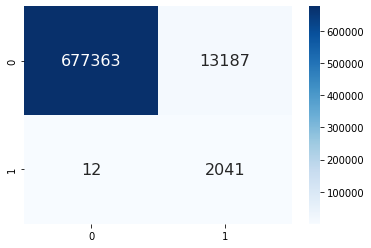

In [91]:
results_rf = {"Confusion Matrix":cm_rf,"Classification Report":cr_rf,"Auc Score":auc_rf}
for i in results_rf:
  print(f'{i} :')
  print(results_rf[i])
  print()
sns.heatmap(cm_rf, cmap="Blues", annot=True, fmt='d', annot_kws={"size": 16})

### 2. XGBoost

In [34]:
xgb = XGBClassifier()
xgb.fit(X_train_scaler, y_train_US)
xgb_pred = xgb.predict(X_test_scaler)

In [35]:
cm_xgb = confusion_matrix(y_test, xgb_pred)
cr_xgb = classification_report(y_test, xgb_pred)
fpr_xgb, recall_xgb, thresholds_xgb = roc_curve(y_test, xgb_pred)
auc_xgb = auc(fpr_xgb, recall_xgb)

Confusion Matrix :
[[672793  17757]
 [    12   2041]]

Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    690550
           1       0.10      0.99      0.19      2053

    accuracy                           0.97    692603
   macro avg       0.55      0.98      0.59    692603
weighted avg       1.00      0.97      0.98    692603


Auc Score :
0.9842203047804607



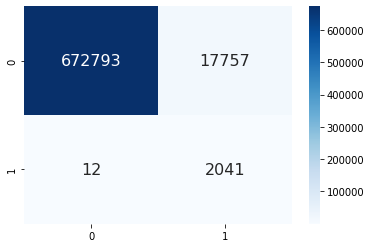

In [90]:
results_xgb = {"Confusion Matrix":cm_xgb,"Classification Report":cr_xgb,"Auc Score":auc_xgb}
for i in results_xgb:
  print(f'{i} :')
  print(results_xgb[i])
  print()
sns.heatmap(cm_xgb, cmap="Blues", annot=True, fmt='d', annot_kws={"size": 16})

## Deep learning Model

### 1. Auto Encoder

In [59]:
import tensorflow as tf
import keras
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import regularizers
from keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.metrics import mean_squared_error, precision_recall_curve

In [38]:
df2 = df[(df['type'] == 'CASH_OUT') | (df['type'] == 'TRANSFER')]
df2.loc[df2.type == 'TRANSFER', 'type'] = 0
df2.loc[df2.type == 'CASH_OUT', 'type'] = 1
X_train, X_test = train_test_split(df2, test_size = 0.25, random_state=0)

X_train = X_train[X_train.isFraud == 0]
y_test = X_test['isFraud']

X_train = X_train.drop(['isFraud', 'isFlaggedFraud'], axis=1)
X_test = X_test.drop(['isFraud', 'isFlaggedFraud'], axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [39]:
X_train

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
3379101,254,0,828084.08,C154972758,5545.00,0.00,C2123420535,350982.99,1179067.07
3048737,234,0,943288.67,C699830866,0.00,0.00,C1979439898,2801734.12,3745022.80
5050086,354,1,206511.88,C825867429,0.00,0.00,C753402084,5269109.41,5475621.29
3095296,235,1,69588.20,C192623727,144.00,0.00,C1530291949,2047313.88,2116902.08
1027108,48,1,67812.85,C893437023,31247.00,0.00,C1565426111,319896.76,387709.60
...,...,...,...,...,...,...,...,...,...
5139614,356,0,912293.75,C445674588,0.00,0.00,C921596415,1286148.78,2198442.53
2188950,185,0,1274623.80,C596454654,11014.00,0.00,C813337546,0.00,1274623.80
5062777,354,0,685894.42,C522797589,0.00,0.00,C1331646906,3010343.11,3696237.54
3386091,255,0,196479.50,C1893359559,0.00,0.00,C1209560805,393724.62,590204.13


In [40]:
X_train_dum = X_train.drop(['nameOrig', 'nameDest'], axis =1)
X_test_dum = X_test.drop(['nameOrig', 'nameDest'], axis =1)

In [41]:
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train_dum)
X_test_scaler = scaler.transform(X_test_dum)

In [42]:
X_train_scaler.shape, X_test_scaler.shape

((2071664, 7), (692603, 7))

In [43]:
input_dim = X_train_scaler.shape[1]
encoding_dim = 28

In [61]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation = 'tanh', 
                activity_regularizer=regularizers.l1(1e-6))(input_layer)
encoder = Dropout(0.2)(encoder)
encoder = Dense(int(encoding_dim / 2), activation='relu')(encoder)
encoder = Dense(int(encoding_dim / 4), activation='relu')(encoder)

decoder = Dense(int(encoding_dim / 2), activation='relu')(encoder)
decoder = Dropout(0.2)(decoder)
decoder = Dense(encoding_dim, activation='relu')(decoder)
decoder = Dense(input_dim, activation='tanh')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_11 (Dense)            (None, 28)                224       
                                                                 
 dropout_1 (Dropout)         (None, 28)                0         
                                                                 
 dense_12 (Dense)            (None, 14)                406       
                                                                 
 dense_13 (Dense)            (None, 7)                 105       
                                                                 
 dense_14 (Dense)            (None, 14)                112       
                                                                 
 dropout_2 (Dropout)         (None, 14)                0   

In [62]:
nb_epoch = 10
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train_scaler, X_train_scaler,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test_scaler, X_test_scaler),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/10
64740/64740 [==============================] - 278s 4ms/step - loss: 2.2718e-04 - accuracy: 0.9957 - val_loss: 0.0027 - val_accuracy: 0.9963
Epoch 2/10
64740/64740 [==============================] - 202s 3ms/step - loss: 9.1517e-05 - accuracy: 0.9960 - val_loss: 0.0037 - val_accuracy: 0.9712
Epoch 3/10
64740/64740 [==============================] - 183s 3ms/step - loss: 8.8003e-05 - accuracy: 0.9960 - val_loss: 0.0037 - val_accuracy: 0.9878
Epoch 4/10
64740/64740 [==============================] - 200s 3ms/step - loss: 8.5610e-05 - accuracy: 0.9959 - val_loss: 0.0038 - val_accuracy: 0.9710
Epoch 5/10
64740/64740 [==============================] - 198s 3ms/step - loss: 8.3502e-05 - accuracy: 0.9961 - val_loss: 0.0039 - val_accuracy: 0.9694
Epoch 6/10
64740/64740 [==============================] - 206s 3ms/step - loss: 7.8130e-05 - accuracy: 0.9961 - val_loss: 0.0035 - val_accuracy: 0.9693
Epoch 7/10
64740/64740 [==============================] - 212s 3ms/step - loss: 7.8809e-

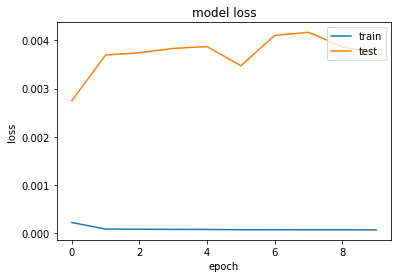

In [63]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [64]:
auto_pred = autoencoder.predict(X_test_scaler)

In [70]:
mse = np.mean(np.power(X_test_scaler - auto_pred, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [71]:
error_df.describe()

,reconstruction_error,true_class
count,692603.00,692603.00
mean,0.00,0.00
std,0.00,0.05
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,0.01,0.00
max,0.39,1.00


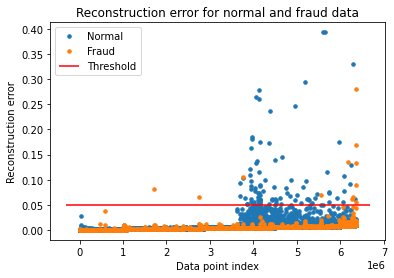

In [88]:
threshold = 0.05
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

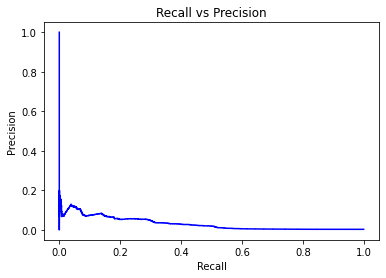

In [87]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

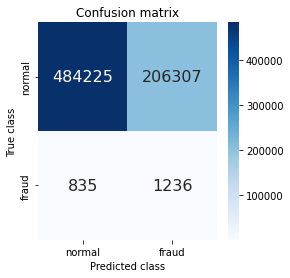

 Accuracy:  0.700922462074233
 Recall:  0.5968131337518107
 Precision:  0.005955392376519565


In [89]:
threshold_fixed =0.005
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.true_class, pred_y)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels= ['normal', 'fraud'], yticklabels= ['normal', 'fraud'], 
            cmap='Blues', annot=True, fmt='d', annot_kws={"size": 16});
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(" Accuracy: ",accuracy_score(error_df['true_class'], error_df['pred']))
print(" Recall: ",recall_score(error_df['true_class'], error_df['pred']))
print(" Precision: ",precision_score(error_df['true_class'], error_df['pred']))